In [ ]:
# Install YOLOv8 and other dependencies
!pip install ultralytics opencv-python pytesseract


In [ ]:
# Install YOLOv8 and dependencies
!pip install ultralytics opencv-python pytesseract

# Import necessary libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

# Initialize Tesseract (for OCR)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default for Colab

# Step 1: Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Use 'n', 's', 'm', or 'l' based on your preference

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Step 2: Detect objects using YOLOv8
    results = model(img)

    # Step 3: Parse detection results
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Step 4: Filter for vehicles and license plates
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Assuming YOLOv8 has been fine-tuned to detect plates
            # Step 5: Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Step 6: OCR to extract text
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')
            print(f"Detected Plate Text: {plate_text.strip()}")

            # Display cropped license plate
            cv2_imshow(plate_img)

    # Display the annotated image
    cv2_imshow(img)

# Step 7: Test the function with an image
image_path = 'creta.jpg'  # Replace with the path to your image
detect_vehicles_and_plates(image_path)


Output hidden; open in https://colab.research.google.com to view.

uo


In [ ]:
# Install necessary packages if not already installed
!pip install ultralytics opencv-python pytesseract

# Import required libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Initialize Tesseract (for OCR)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default for Colab

# Step 1: Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Change to other versions if required (e.g., 'yolov8s.pt')

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Step 2: Detect objects using YOLOv8
    results = model(img)
    # Results object contains the bounding boxes, classes, and confidences

    # Step 3: Parse detection results and check for vehicle classes
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    found_vehicle = False  # Flag to track if any vehicle is detected

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Step 4: Filter for vehicles and license plates
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            found_vehicle = True
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Assuming YOLOv8 detects plates
            # Step 5: Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Step 6: OCR to extract text
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')
            print(f"Detected Plate Text: {plate_text.strip()}")

            # Display cropped license plate
            cv2_imshow(plate_img)

    if not found_vehicle:
        print("No vehicles detected.")

    # Display the final annotated image
    cv2_imshow(img)

# Step 2: Upload Multiple Images using Google Colab File Upload
from google.colab import files
uploaded = files.upload()  # Upload multiple images at once

# Loop through the uploaded images and process each
for image_name in uploaded.keys():
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


Saving vehiclezip.zip to vehiclezip (4).zip
Processing image: vehiclezip (4).zip
Error: Could not load image vehiclezip (4).zip


Saving 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg to 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg
Uploaded: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg
Do you want to upload another image? (yes/no): yes


Saving 88907369.webp to 88907369.webp
Uploaded: 88907369.webp
Do you want to upload another image? (yes/no): yes


Saving 1525347911281641639714016456657186721521519n_20200510012506.jpg to 1525347911281641639714016456657186721521519n_20200510012506.jpg
Uploaded: 1525347911281641639714016456657186721521519n_20200510012506.jpg
Do you want to upload another image? (yes/no): no
Processing image: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg

0: 448x640 1 person, 1 car, 2 motorcycles, 1 bus, 1 truck, 174.6ms
Speed: 3.4ms preprocess, 174.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


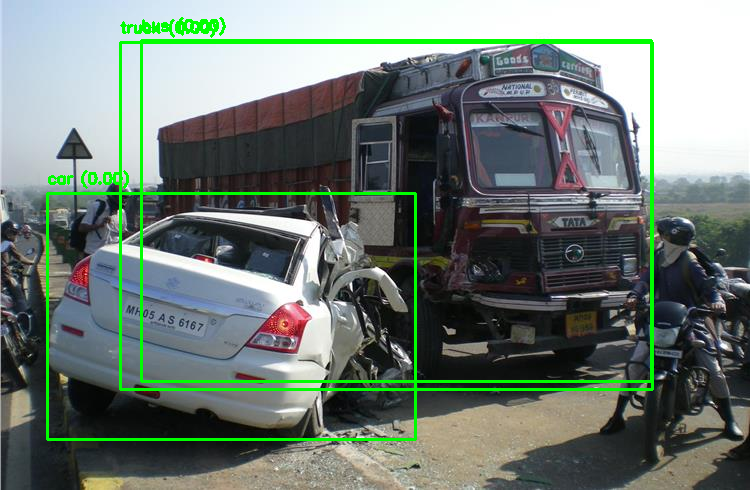

Processing image: 88907369.webp

0: 384x640 9 persons, 4 cars, 1 motorcycle, 1 truck, 204.0ms
Speed: 2.9ms preprocess, 204.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


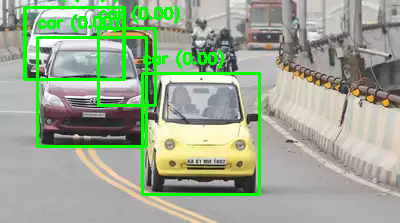

Processing image: 1525347911281641639714016456657186721521519n_20200510012506.jpg

0: 384x640 9 persons, 1 car, 1 handbag, 212.5ms
Speed: 3.6ms preprocess, 212.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


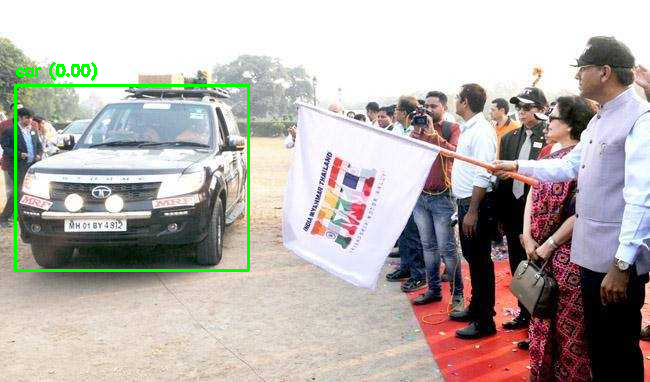

In [ ]:
# Install necessary packages if not already installed
!pip install ultralytics opencv-python pytesseract

# Import required libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

# Initialize Tesseract (for OCR)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default for Colab

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Change to other versions if required (e.g., 'yolov8s.pt')

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Detect objects using YOLOv8
    results = model(img)

    # Parse detection results
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    found_vehicle = False  # Flag to track if any vehicle is detected

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Filter for vehicles and license plates
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            found_vehicle = True
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Assuming YOLOv8 detects plates
            # Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # OCR to extract text
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')
            print(f"Detected Plate Text: {plate_text.strip()}")

            # Display cropped license plate
            cv2_imshow(plate_img)

    if not found_vehicle:
        print("No vehicles detected.")

    # Display the final annotated image
    cv2_imshow(img)

# Function to upload multiple images
def upload_multiple_images():
    uploaded_files = []  # List to store uploaded images

    # Prompt for file upload multiple times
    while True:
        uploaded = files.upload()
        for image_name in uploaded.keys():
            uploaded_files.append(image_name)
            print(f"Uploaded: {image_name}")

        # Ask the user if they want to upload more images
        more = input("Do you want to upload another image? (yes/no): ")
        if more.lower() != 'yes':
            break

    return uploaded_files

# Upload multiple images and process them
uploaded_files = upload_multiple_images()

# Process each uploaded image
for image_name in uploaded_files:
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


new

In [ ]:
# Install necessary packages if not already installed
!pip install ultralytics opencv-python pytesseract

# Import required libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

# Initialize Tesseract (for OCR)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default for Colab

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Change to other versions if required (e.g., 'yolov8s.pt')

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Detect objects using YOLOv8
    results = model(img)

    # Parse detection results
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    found_vehicle = False  # Flag to track if any vehicle is detected
    plate_texts = []  # List to store detected license plate texts

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Filter for vehicles and license plates
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            found_vehicle = True
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Assuming YOLOv8 detects plates
            # Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Step 1: OCR to extract text
            plate_text = pytesseract.image_to_string(plate_img, config='--psm 8')  # OCR configuration for single-line text
            print(f"Detected Plate Text: {plate_text.strip()}")
            plate_texts.append(plate_text.strip())

            # Display cropped license plate
            cv2_imshow(plate_img)

    if not found_vehicle:
        print("No vehicles detected.")

    # Display the final annotated image
    cv2_imshow(img)

    # Step 2: Print all detected license plate texts
    if plate_texts:
        print("Detected License Plates:")
        for text in plate_texts:
            print(f"Plate: {text}")
    else:
        print("No license plate detected.")

# Function to upload multiple images
def upload_multiple_images():
    uploaded_files = []  # List to store uploaded images

    # Prompt for file upload multiple times
    while True:
        uploaded = files.upload()
        for image_name in uploaded.keys():
            uploaded_files.append(image_name)
            print(f"Uploaded: {image_name}")

        # Ask the user if they want to upload more images
        more = input("Do you want to upload another image? (yes/no): ")
        if more.lower() != 'yes':
            break

    return uploaded_files

# Upload multiple images and process them
uploaded_files = upload_multiple_images()

# Process each uploaded image
for image_name in uploaded_files:
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


Output hidden; open in https://colab.research.google.com to view.